In [2]:
## Load dataset with and without SAR
from importlib import reload

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import data
reload(data)
import torch





In [4]:

trainorgdata = data.AmlsimDataset(node_file='data/100K_accts_MID5/bank/train/nodes.csv', edge_file='data/100K_accts_MID5/bank/train/edges.csv', node_features=True, node_labels=True).get_data()
traindatawithout = data.AmlsimDataset(node_file='data/100K_accts_MID5_withoutSAR/bank/train/nodes.csv', edge_file='data/100K_accts_MID5_withoutSAR/bank/train/edges.csv', node_features=True, node_labels=True).get_data()

orgdata = data.AmlsimDataset(node_file='data/100K_accts_MID5/bank/test/nodes.csv', edge_file='data/100K_accts_MID5/bank/test/edges.csv', node_features=True, node_labels=True).get_data()
datawithout = data.AmlsimDataset(node_file='data/100K_accts_MID5_withoutSAR/bank/test/nodes.csv', edge_file='data/100K_accts_MID5_withoutSAR/bank/test/edges.csv', node_features=True, node_labels=True).get_data()

df_nodes=pd.read_csv('data/100K_accts_MID5/bank/train/nodes.csv')
#nodes_train_with=pd.read_csv('data/100K_accts_MID5/bank/train/nodes.csv')



sorting
sorting
sorting
sorting


In [5]:
df_nodes
df_nodes[df_nodes['account'] == 4537]
df_nodes[0]

,account,bank,sum,mean,median,std,max,min,in_sum,out_sum,...,count_days_in_bank,count_phone_changes,sum_spending,mean_spending,median_spending,std_spending,max_spending,min_spending,count_spending,is_sar
21350,4537,bank,8596.04,477.557778,432.64,351.159983,1246.83,96.94,8596.04,0.0,...,270.0,0.0,256774.4,755.218824,397.635,1351.994203,6312.67,1.03,340,0.0


In [8]:
print(trainorgdata.x[21349])



tensor([ 2.2662e+04,  4.5324e+02,  5.0313e+02,  5.7081e+02,  1.3619e+03,
        -1.1237e+03,  2.7914e+04, -5.2524e+03,  6.6462e+02, -6.5654e+02,
         5.0313e+02, -5.3435e+02,  2.9676e+02,  2.9888e+02,  1.3619e+03,
        -4.3376e+02,  2.0206e+02, -1.1237e+03,  4.2000e+01,  8.0000e+00,
         2.0000e+00,  1.0000e+00,  2.5500e+02,  0.0000e+00,  3.3170e+05,
         1.1131e+03,  4.4833e+02,  2.5307e+03,  1.0985e+04,  1.0980e+01,
         2.9800e+02])


In [39]:
edges = pd.read_csv('data/100K_accts_MID5/bank/train/edges.csv')
edge_index = torch.tensor(edges[['src', 'dst']].values, dtype=torch.long)
edge_index = edge_index.t().contiguous()
edge_index

tensor([[ 4537,  4537, 34126,  ..., 80095, 19444, 50524],
        [22198, 85796, 63589,  ..., 58964, 29876, 60325]])

In [40]:
trainorgdata.edge_index


tensor([[ 4537,  4537, 34126,  ..., 80095, 19444, 50524],
        [22198, 85796, 63589,  ..., 58964, 29876, 60325]])

In [41]:
datawithout.edge_index

tensor([[69568, 69568, 24538,  ...,  4830, 10429, 37763],
        [ 8135, 66439, 72129,  ..., 13311, 13311,  7685]])

In [42]:
orgdata.edge_index

tensor([[48578, 48578, 12911,  ..., 39328, 18283, 10800],
        [42578, 85713, 48564,  ...,  9602, 10244,  9764]])

In [43]:
## print out all nodes existing in orgdata but not datawithout
for n in orgdata.x:
    if n not in datawithout.x:
        print(n)

KeyboardInterrupt: 

In [13]:
mean_o=trainorgdata.x.mean(axis=0)
std_o=trainorgdata.x.std(axis=0)
mean_w=traindatawithout.x.mean(axis=0)
std_w=traindatawithout.x.std(axis=0)

In [14]:
# Normalize using rerspectively train dataset
trainorgdata.x=(trainorgdata.x-mean_o)/std_o
traindatawithout.x=(traindatawithout.x-mean_w)/std_w
orgdata.x=(orgdata.x-mean_o)/std_o
datawithout.x=(datawithout.x-mean_w)/std_w

In [15]:
datawithout.x[0]


tensor([ 0.2635,  0.4928,  0.4821, -0.4472,  0.0950,  0.6721, -0.2222,  0.5179,
        -0.0427,  1.1575, -0.0280,  1.1231,  0.1725, -0.7055, -0.0704,  0.8993,
        -0.0284,  1.1708, -0.1004, -0.2691,  0.8783, -0.0779,  2.3960,     nan,
         1.3402,  0.8933, -0.1576,  0.8555,  0.7655, -0.1024,  0.9294])

In [16]:
orgdata.x[0]

tensor([ 0.3033,  0.9529,  0.6463, -1.1969,  0.2656,  1.2344, -0.1090,  0.4891,
        -0.1700,  1.7455, -0.2578,  1.5859, -0.1455, -1.1036,  0.2398,  0.8897,
         0.0352,  1.3399,  0.0087, -0.4310,  0.1872, -0.3251,  4.5183, -0.0265,
         0.5013,  1.1299,  0.5183,  0.9362,  0.7581, -0.5249, -1.6731])

In [17]:
diff=datawithout.x-orgdata.x
diff

RuntimeError: The size of tensor a (95861) must match the size of tensor b (99897) at non-singleton dimension 0

In [160]:
diff_mean=diff.mean(axis=0)
diff_std=diff.std(axis=0)

In [186]:
importance_score=(diff-diff_mean)/diff_std
node_to_inspect=0
importance_score[node_to_inspect]
print(importance_score[node_to_inspect])
temp=-importance_score
sorted_importance_score=temp.argsort()
sorted_importance_score[node_to_inspect]


tensor([-0.9909, -1.2868, -0.0771, -0.3876, -1.1791, -0.6720, -0.1368, -0.2563,
         0.1490,  0.5253, -1.0427, -1.8530, -0.3892,  0.7006,  0.2187,  1.2279,
        -1.0480,  0.0972,  0.2249,  0.0909,  0.4406, -0.1300, -0.0780,  0.4135,
        -0.9537,  0.7604,  0.8383,  0.2557,  0.7449, -1.3434,  1.4754],
       dtype=torch.float64)


tensor([30, 15, 26, 25, 28, 13,  9, 20, 23, 27, 18, 14,  8, 17, 19,  2, 22, 21,
         6,  7,  3, 12,  5, 24,  0, 10, 16,  4,  1, 29, 11])

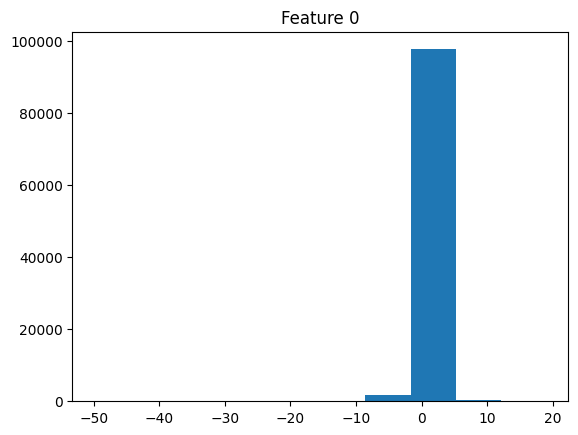

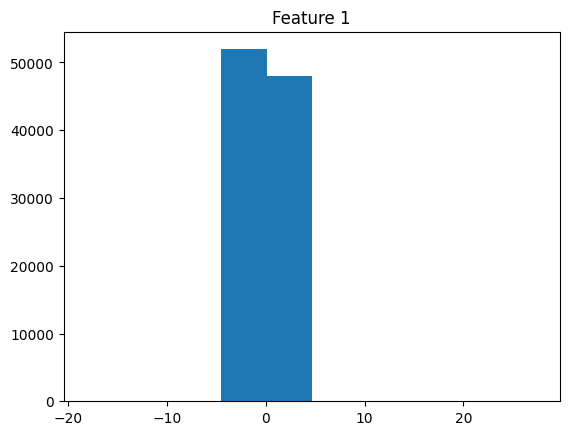

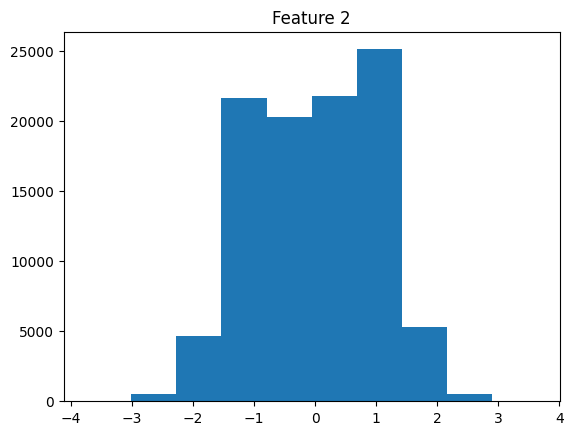

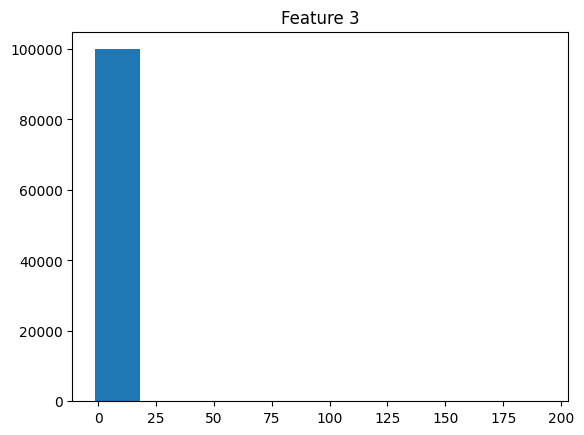

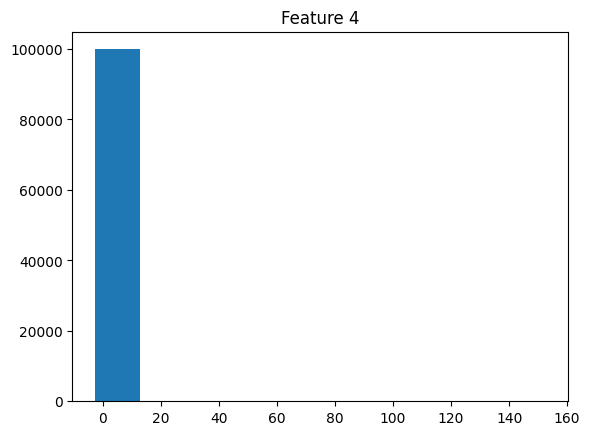

KeyboardInterrupt: 

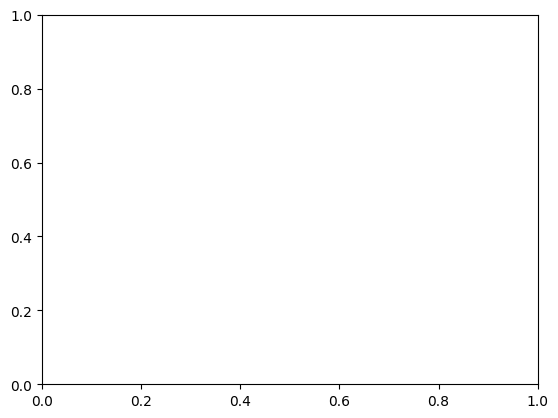

In [159]:
for i  in range (diff.shape[1]):
    plt.hist(orgdata.x[:,i])
    plt.title('Feature '+str(i))
    plt.show()
    plt.clf()

In [133]:
# For a random node in the testset, calculate the deviation from the mean for each feature
# and plot the deviation for each feature

node= 10
testdata.x[10]

tensor([ 5.8059e+03,  8.2941e+02,  9.4188e+02,  4.2056e+02,  1.3316e+03,
         3.9533e+02,  5.8059e+03, -1.2979e-09,  8.2941e+02, -1.6510e-09,
         9.4188e+02, -1.9660e-09,  4.2056e+02,  7.6349e-10,  1.3316e+03,
        -1.7560e-09,  3.9533e+02, -1.3361e-09,  7.0000e+00,  1.4506e-09,
         2.0000e+00,  5.3444e-10,  1.7400e+02,  1.1452e-10,  9.3464e+04,
         9.2539e+02,  5.0049e+02,  1.7218e+03,  7.6295e+03,  1.1840e+01,
         1.0100e+02])